**Assignment-1**

Name : Mudit sand

Roll No. : 203100068

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Problem 2)

Dataset Link : - https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression#

2) part - a : download the dataset

In [2]:
from google.colab import files
winedata = files.upload()

Saving Data_Cortex_Nuclear.xls to Data_Cortex_Nuclear (2).xls


2) Part-b : We will predict the genotype.

2) Part-c : Explore, visualize and process the data.

In [3]:
data = pd.read_excel('Data_Cortex_Nuclear.xls')
display(data)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [4]:
#getting the null count in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

Observation:

1) there are many columns with null values so we need to replace the null values.

2) There are 5 coloumns which has the categorical variable, one is genotype which is going to be out target feature, another is mouse_id that we can drop since this is not of biological importance... other features we will look from the further analysis.

Next:-
We need to convert the categorical variable into binary values.

In [5]:
## SInce in the problem it is mentioned that we have to use expression variables from DYRK1A_N to CaNA_N
dataone = data.drop(['MouseID' , 'Treatment','Behavior', 'class' ], axis = 1) ### Dropping the mouse id.
datatarget = data['Genotype']
data_one = dataone.drop(['Genotype'],axis=1)


In [6]:
target = pd.DataFrame(datatarget)
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Genotype  1080 non-null   object
dtypes: object(1)
memory usage: 8.6+ KB


In [7]:
#next we will convert the categorical target varible to binary variable.
# maptovalues = {
#     'Control' : (0,1),
#     'Ts65Dn' : (1,0)
# }
# target['Genotype'] = target['Genotype'].map(maptovalues)
# target.head()
target = list()
for i,values in enumerate(datatarget.values):
  if values == 'Control':
    target.append(0)
  else :
    target.append(1)
print(target)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
#binary values of the target parameter
target_y = np.array(target)

Now providing iterative imputer:-

In [9]:
columnnames = data.iloc[:,1:78].columns
display(columnnames)

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object')

In [10]:
#iterative imputer for missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
datavalues = data.iloc[:,1:78].values
imputer = IterativeImputer(max_iter=10, random_state=0)
# fit dataset values in iterator
imputer.fit(datavalues)
# transform the values
datatrans = imputer.transform(datavalues)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [11]:
print(datatrans)

[[0.50364388 0.74719322 0.4301753  ... 0.13179003 0.1281856  1.67565235]
 [0.51461708 0.68906355 0.41177034 ... 0.13510297 0.1311187  1.74360965]
 [0.50918309 0.7302468  0.41830878 ... 0.13336183 0.12743108 1.92642659]
 ...
 [0.22869955 0.39517937 0.23411809 ... 0.22919311 0.35521305 1.43082502]
 [0.22124241 0.41289438 0.24397413 ... 0.25131651 0.36535319 1.40403123]
 [0.30262572 0.46105919 0.25656431 ... 0.25299481 0.36527803 1.37099946]]


In [12]:
data_feature = pd.DataFrame(data=datatrans, columns= columnnames)
data_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1080 non-null   float64
 1   ITSN1_N          1080 non-null   float64
 2   BDNF_N           1080 non-null   float64
 3   NR1_N            1080 non-null   float64
 4   NR2A_N           1080 non-null   float64
 5   pAKT_N           1080 non-null   float64
 6   pBRAF_N          1080 non-null   float64
 7   pCAMKII_N        1080 non-null   float64
 8   pCREB_N          1080 non-null   float64
 9   pELK_N           1080 non-null   float64
 10  pERK_N           1080 non-null   float64
 11  pJNK_N           1080 non-null   float64
 12  PKCA_N           1080 non-null   float64
 13  pMEK_N           1080 non-null   float64
 14  pNR1_N           1080 non-null   float64
 15  pNR2A_N          1080 non-null   float64
 16  pNR2B_N          1080 non-null   float64
 17  pPKCAB_N      

In [13]:
for col in data_feature.columns.values :
  print(str(col) + ' has| ' +str(len(data_feature[col].unique())) +' |unique values ')

DYRK1A_N has| 1080 |unique values 
ITSN1_N has| 1079 |unique values 
BDNF_N has| 1080 |unique values 
NR1_N has| 1080 |unique values 
NR2A_N has| 1080 |unique values 
pAKT_N has| 1079 |unique values 
pBRAF_N has| 1078 |unique values 
pCAMKII_N has| 1080 |unique values 
pCREB_N has| 1080 |unique values 
pELK_N has| 1080 |unique values 
pERK_N has| 1080 |unique values 
pJNK_N has| 1079 |unique values 
PKCA_N has| 1080 |unique values 
pMEK_N has| 1080 |unique values 
pNR1_N has| 1080 |unique values 
pNR2A_N has| 1080 |unique values 
pNR2B_N has| 1080 |unique values 
pPKCAB_N has| 1080 |unique values 
pRSK_N has| 1080 |unique values 
AKT_N has| 1080 |unique values 
BRAF_N has| 1080 |unique values 
CAMKII_N has| 1080 |unique values 
CREB_N has| 1076 |unique values 
ELK_N has| 1080 |unique values 
ERK_N has| 1080 |unique values 
GSK3B_N has| 1080 |unique values 
JNK_N has| 1080 |unique values 
MEK_N has| 1079 |unique values 
TRKA_N has| 1078 |unique values 
RSK_N has| 1077 |unique values 
AP

Observation :
Now we can se all the values are nonnull and most of them are unique.

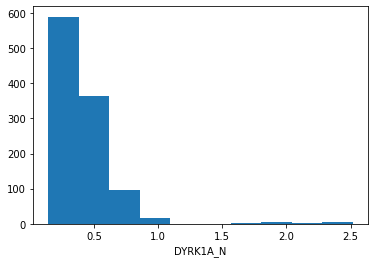

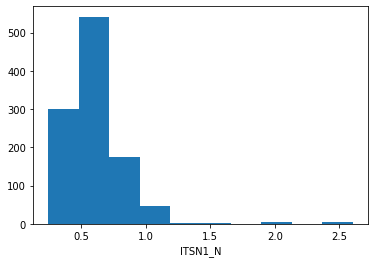

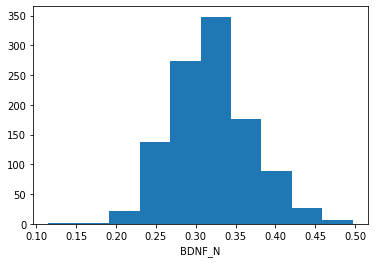

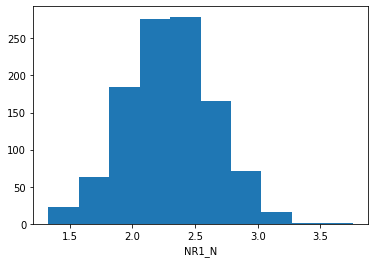

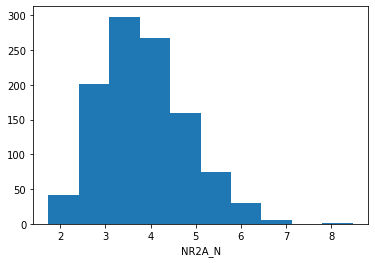

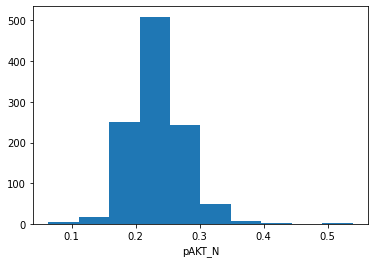

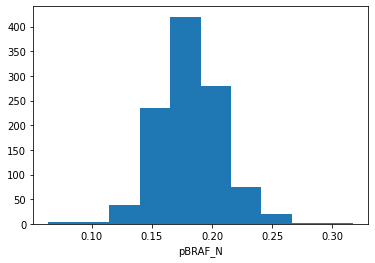

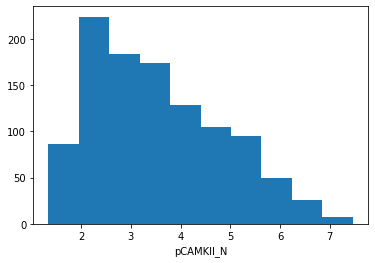

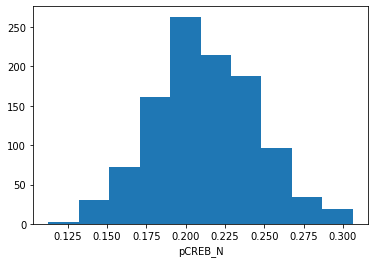

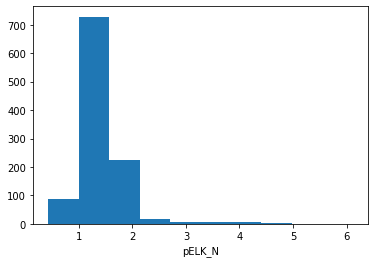

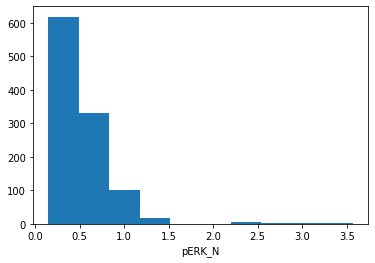

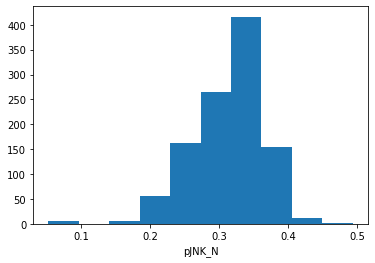

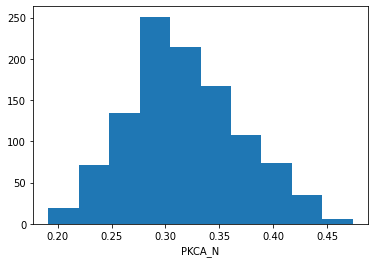

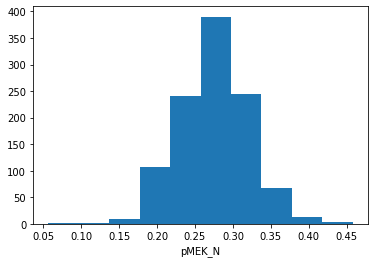

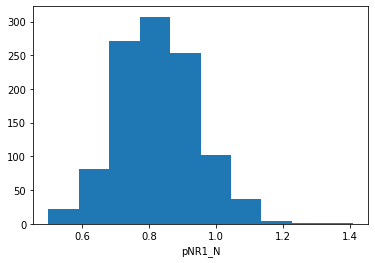

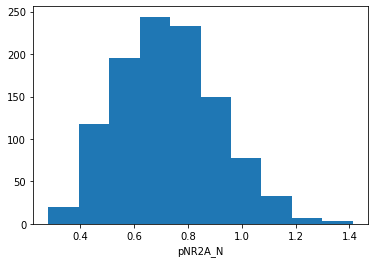

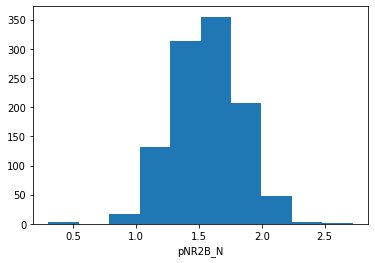

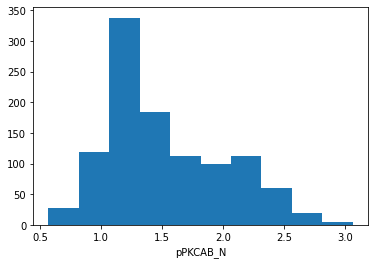

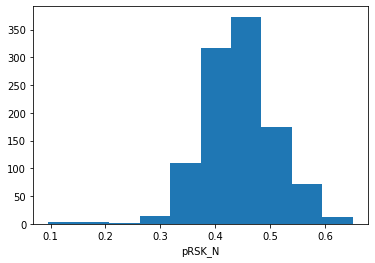

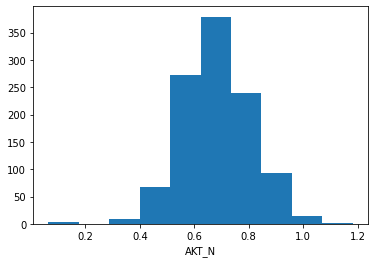

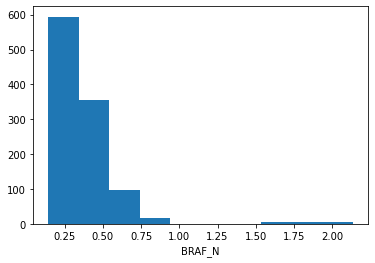

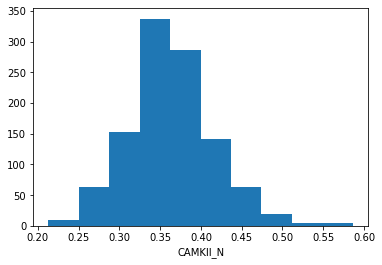

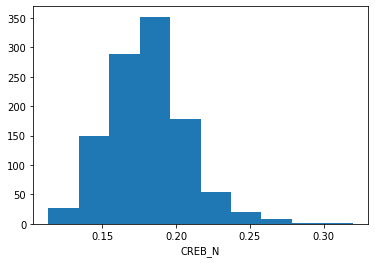

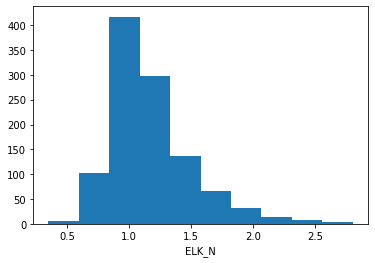

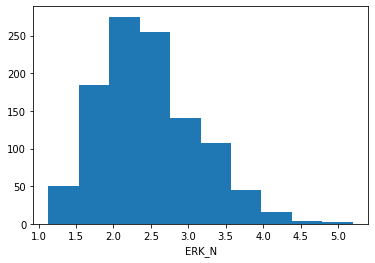

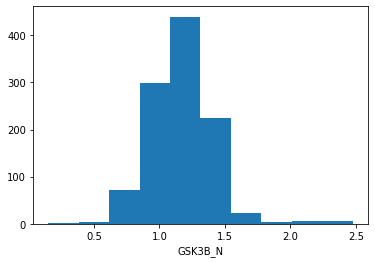

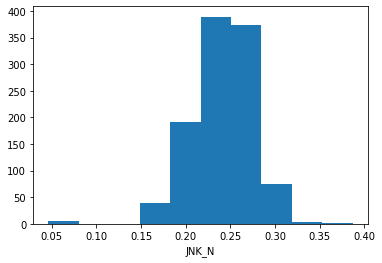

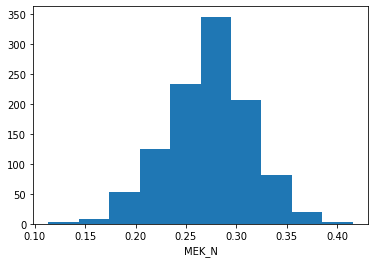

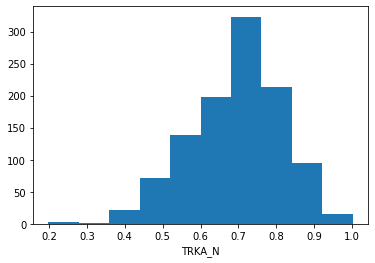

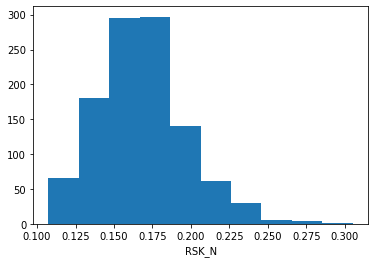

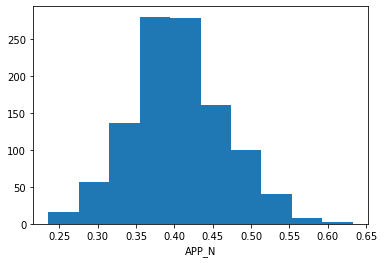

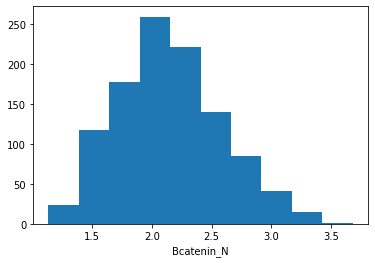

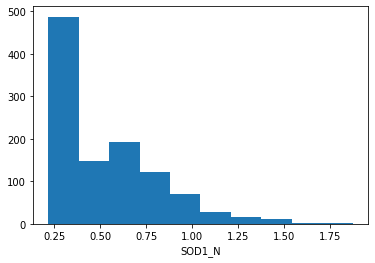

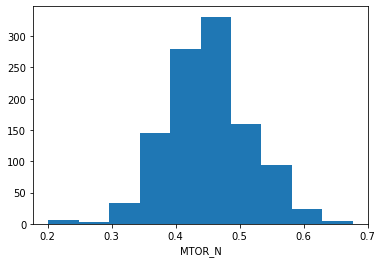

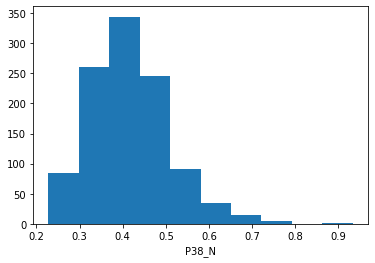

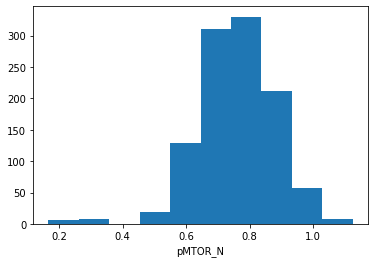

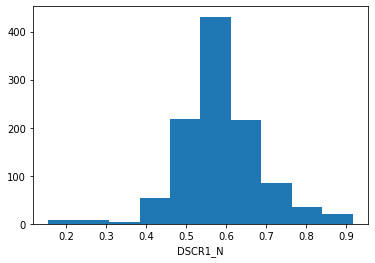

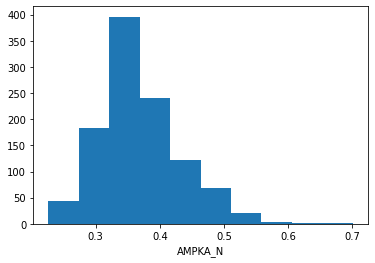

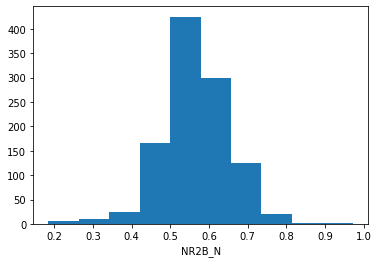

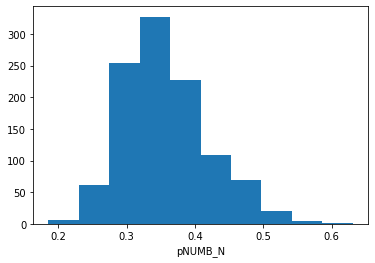

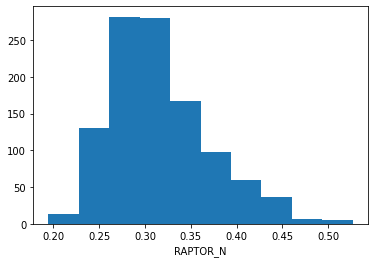

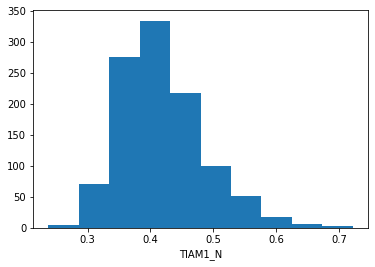

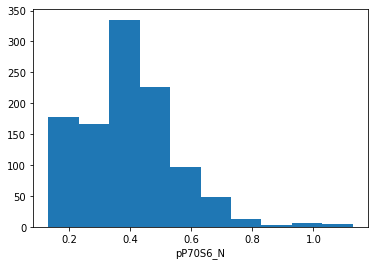

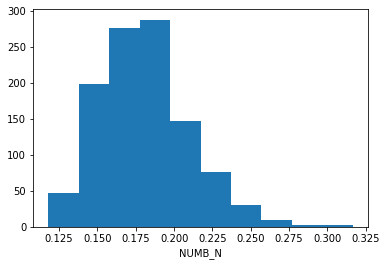

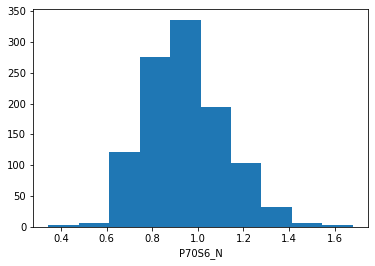

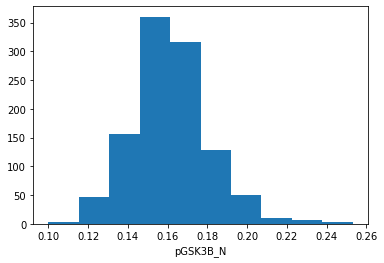

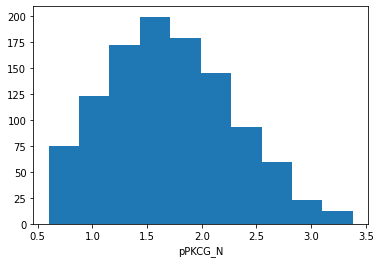

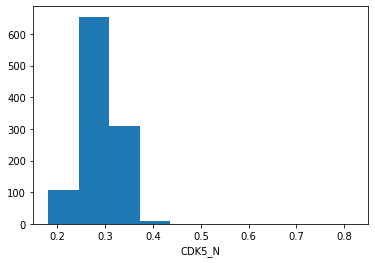

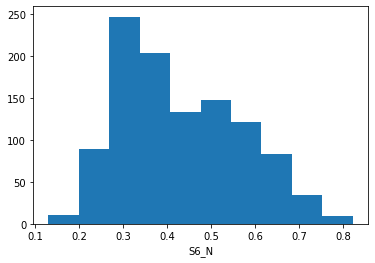

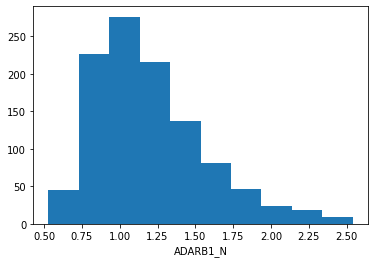

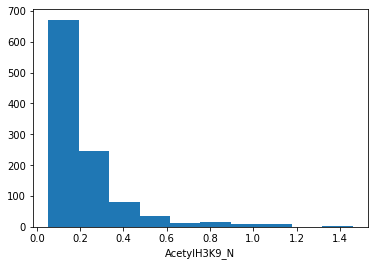

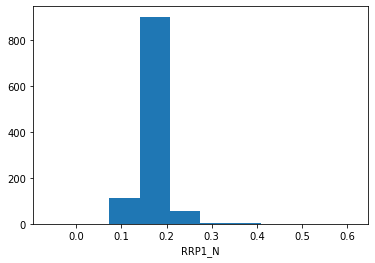

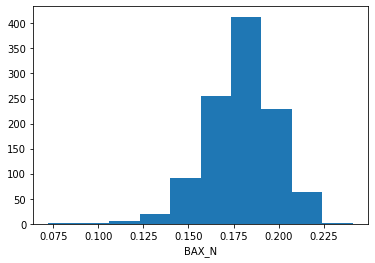

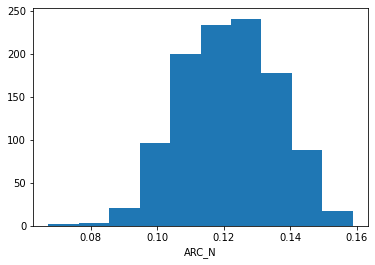

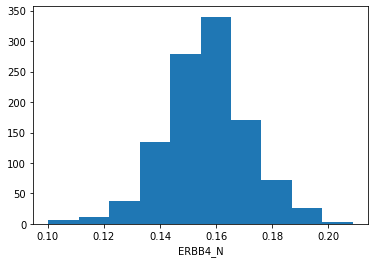

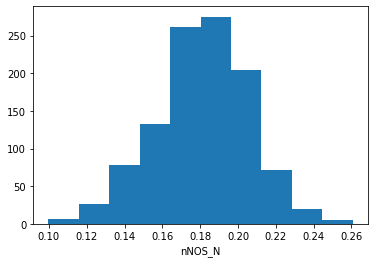

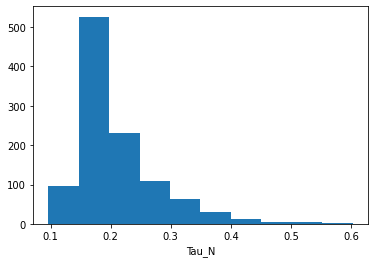

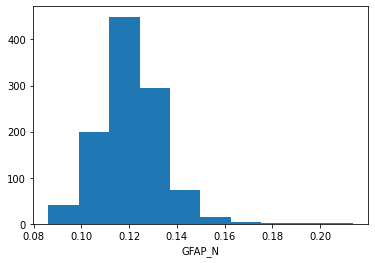

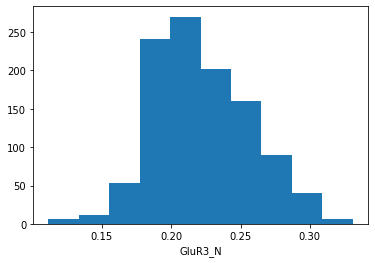

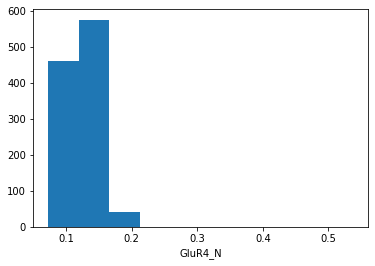

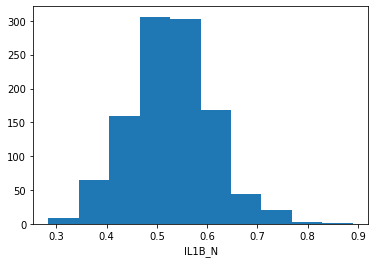

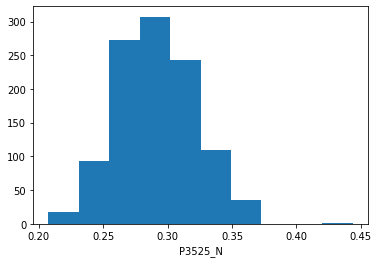

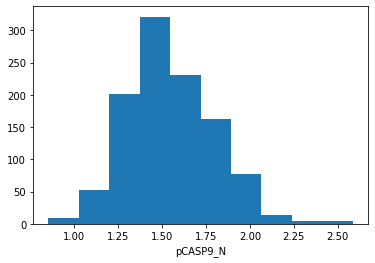

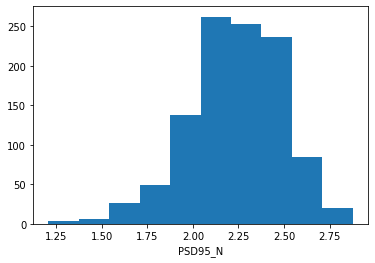

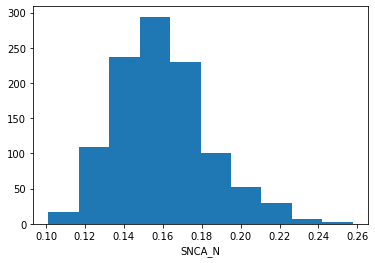

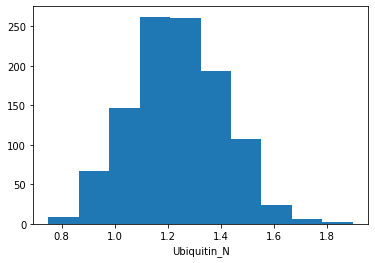

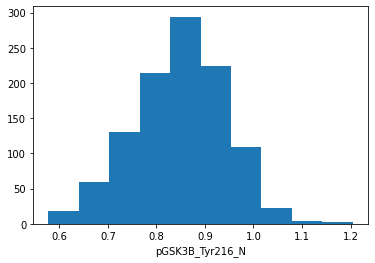

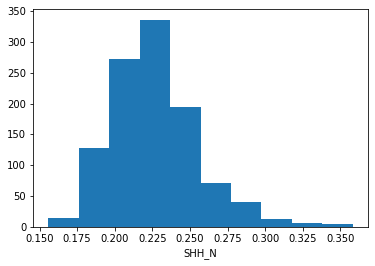

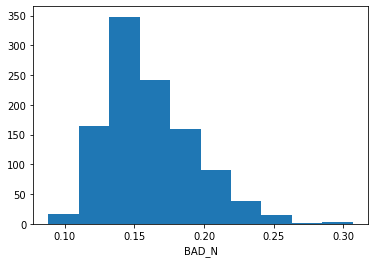

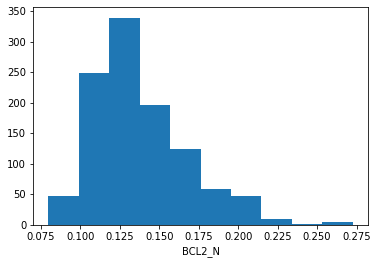

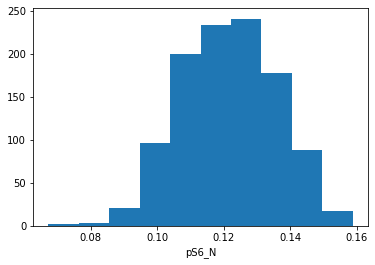

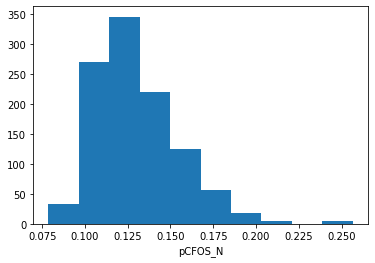

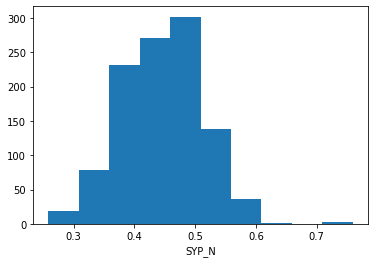

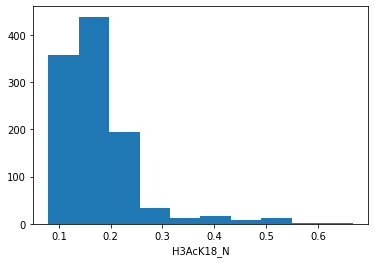

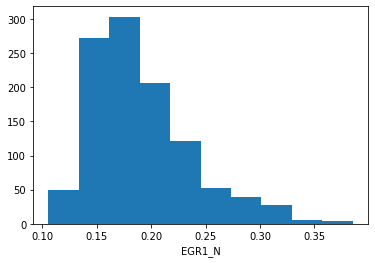

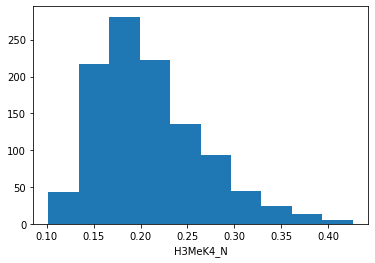

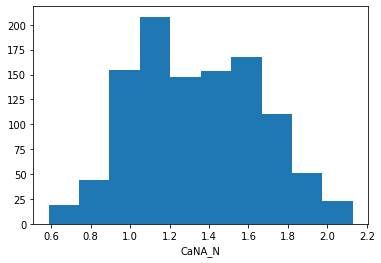

In [14]:
for col in data_feature.columns.values :
  plt.hist(data_feature[col])
  plt.xlabel(col)
  plt.show()

Observation:
All variables seem to spread well

In [15]:
data_feature.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.426006,0.617367,0.319093,2.296830,3.842092,0.233240,0.181864,3.536309,0.212612,1.428723,0.545971,0.313510,0.317979,0.275108,0.825608,0.726367,1.561205,1.525805,0.443063,0.682170,0.378763,0.363376,0.180537,1.168790,2.473987,1.172921,0.241672,0.272390,0.693220,0.168474,0.404843,2.147812,0.542443,0.452392,0.415245,0.758833,0.585153,0.368319,0.565216,0.357093,0.315806,0.418588,0.394910,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.161402,0.138142,0.121521,0.130426,0.446073,0.176442,0.190477,0.209574,1.337784
std,0.249043,0.251341,0.049315,0.346913,0.932476,0.041603,0.027008,1.293493,0.032551,0.466256,0.344831,0.051907,0.052169,0.046123,0.117872,0.188066,0.270747,0.481199,0.066705,0.127264,0.216140,0.052283,0.026348,0.337025,0.652560,0.244488,0.033859,0.041763,0.120663,0.028123,0.061093,0.433311,0.280206,0.065410,0.089177,0.122344,0.100464,0.062507,0.088100,0.062938,0.054088,0.067196,0.156173,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.031972,0.030225,0.014276,0.024395,0.066432,0.076657,0.045847,0.056069,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.349415,1.131796,0.151124,0.046298,0.113658,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.079758,0.067254,0.078677,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.155615,0.205821,0.164619,2.479861,0.190828,1.206389,0.337486,0.281530,0.281850,0.244294,0.743426,0.588230,1.379553,1.168648,0.404152,0.597317,0.264356,0.330887,0.161867,0.943831,1.993693,1.023321,0.220425,0.246598,0.617329,0.149639,0.366469,1.830090,0.319712,0.410961,0.352023,0.683482,0.531223,0.326750,0.515099,0.312771,0.276193,0.372059,0.2821

Here we can see std. of some coloums are very low.

Next we will plot the correlation matrix

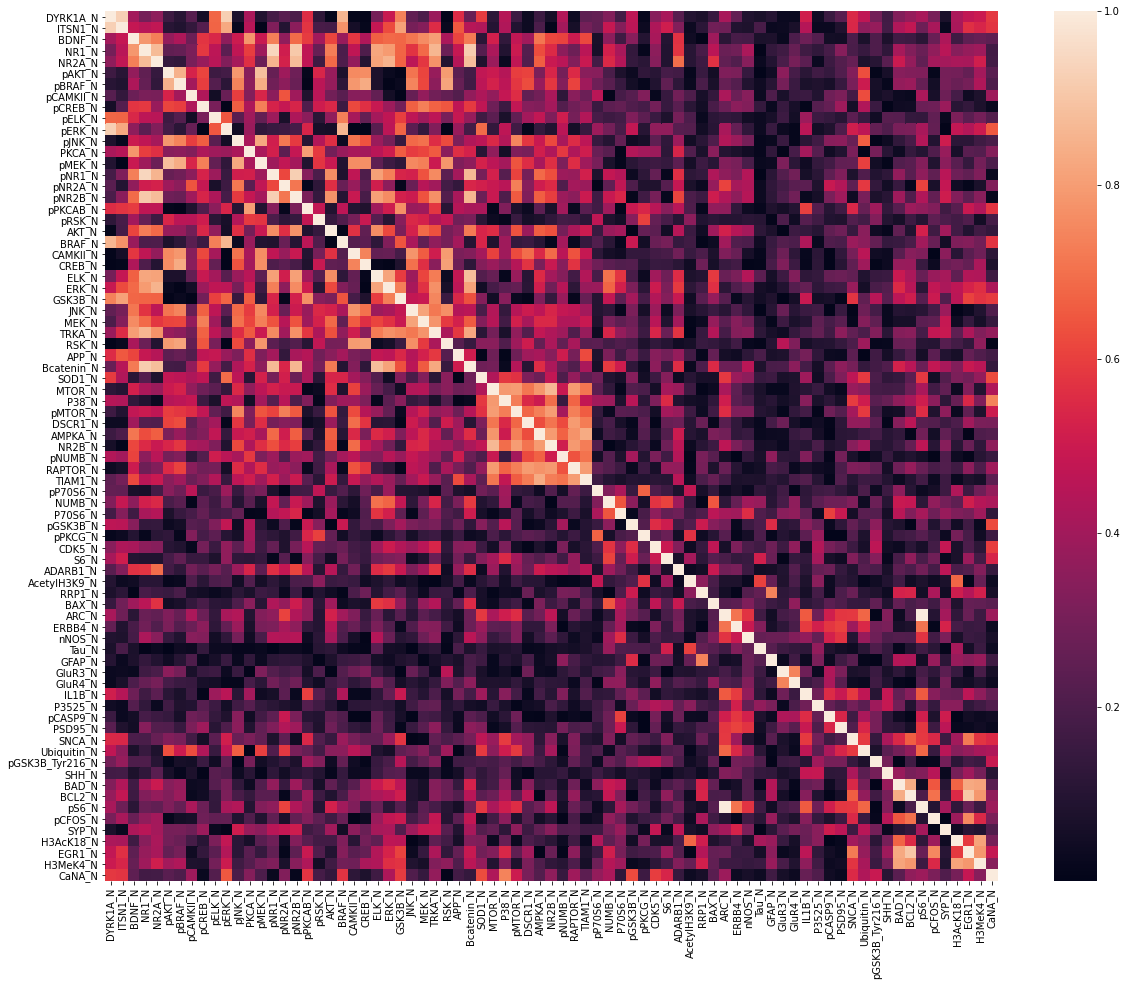

In [17]:
corrMatrix = data_feature.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot= False)
plt.show()

it is clearly visible that ARC_N is strongly corelated with pS6_N so we are dropping the ARC_N

In [22]:
data_feature1 = data_feature.drop(['ARC_N'], axis=1)
data_feature1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1080 non-null   float64
 1   ITSN1_N          1080 non-null   float64
 2   BDNF_N           1080 non-null   float64
 3   NR1_N            1080 non-null   float64
 4   NR2A_N           1080 non-null   float64
 5   pAKT_N           1080 non-null   float64
 6   pBRAF_N          1080 non-null   float64
 7   pCAMKII_N        1080 non-null   float64
 8   pCREB_N          1080 non-null   float64
 9   pELK_N           1080 non-null   float64
 10  pERK_N           1080 non-null   float64
 11  pJNK_N           1080 non-null   float64
 12  PKCA_N           1080 non-null   float64
 13  pMEK_N           1080 non-null   float64
 14  pNR1_N           1080 non-null   float64
 15  pNR2A_N          1080 non-null   float64
 16  pNR2B_N          1080 non-null   float64
 17  pPKCAB_N      

Train test split and noramalizing data.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(data_feature1, target_y, test_size=0.33, random_state=42)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
train_x = pd.DataFrame(scaler.transform(X_train))
train_y = pd.DataFrame(y_train)
display(train_x)
print(train_x.mean())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,-0.725731,-0.889307,-0.977872,-0.451600,-1.052361,-1.093997,-0.981985,-0.721449,-0.839548,1.078339,-0.721113,-1.056727,-1.189353,-1.055562,-0.666389,-0.252076,-0.277895,-1.187876,-0.676445,0.227588,-0.653798,-0.257366,-0.946253,-0.249005,-0.975728,-1.414553,-0.968467,-1.153962,-1.163484,-0.704553,-0.979144,-0.630088,1.409660,1.799838,1.196918,-0.313221,-0.188020,-0.055063,0.526706,-1.413380,-0.497414,-0.731358,-0.111519,-0.904930,-0.696076,-1.478028,-1.244422,-1.575310,-0.970651,-0.854396,-0.564123,-0.667186,-0.912135,-0.042335,-0.585158,-0.418643,-1.297820,0.767953,-0.836030,1.023127,-1.009618,-0.973871,-0.098826,0.606957,-0.760741,-1.477220,0.746441,-0.294337,0.357509,0.151215,-0.217564,-0.957156,-0.465093,0.158556,-0.335095,-1.284652
1,-0.229028,-0.169755,0.493317,-0.173603,-0.439891,0.484528,-0.091357,1.384171,0.736193,-0.127646,-0.368275,0.456438,1.075250,0.633698,-0.356134,0.332313,-0.194550,0.524094,1.324508,0.249604,-0.227953,-0.196656,0.097726,0.224741,0.516230,-0.208830,-0.016611,0.404952,0.193738,-0.101719,0.429930,0.522197,0.220030,-0.340842,0.042895,0.217621,-0.191780,-0.470616,-0.533811,-0.038329,0.493504,-0.034228,-0.040840,-0.049722,0.728815,0.275692,1.567504,0.406872,-0.557876,0.010137,0.070268,0.024096,0.248929,0.351580,-0.323961,0.328957,-0.152283,-0.669140,0.128672,-0.010661,-0.218315,0.905064,0.075287,-0.703969,0.928059,0.763719,-0.492640,0.194201,-0.355672,0.241405,-0.670606,1.500810,-0.124142,-0.714776,-0.395095,-0.040724
2,0.317716,0.145510,0.073470,-0.284862,-0.706621,0.250794,0.470341,-1.170619,0.421692,-0.138718,0.074955,-1.005578,0.370093,0.526059,-0.775996,-1.575067,-0.730636,0.436309,1.235384,-0.995996,0.302630,-0.156801,1.535401,-0.762435,-0.859941,0.552401,0.809615,0.350829,0.095664,1.054688,0.402506,-0.741294,-0.754234,-0.912135,-0.380692,-0.454908,-0.178722,-0.851555,-0.426578,-0.858282,-0.388825,-0.733217,0.629819,-0.399563,-1.235296,1.047104,0.713256,-0.108945,0.304589,-1.108900,-0.193368,0.328609,0.433378,-0.671828,-0.484525,-0.585109,0.864478,-0.564712,-0.817272,0.063192,-0.169062,-0.808106,0.087533,0.038949,-0.917332,0.795214,0.935977,1.444186,1.046878,-0.942212,1.551095,-0.084674,0.760643,1.049055,1.303528,0.997258
3,-0.310124,-0.575568,-0.467882,-0.748571,-0.901566,0.863368,0.373314,-1.371545,0.760594,-0.503260,-0.171007,0.674659,-0.679584,0.059056,-0.381278,-0.910686,-0.741244,-1.276438,-0.889434,-0.929377,-0.264184,0.755803,0.246392,-0.899283,-0.516914,-0.687066,1.000533,0.263679,-0.622379,0.540073,0.025785,-1.001179,-0.721530,0.398500,0.730898,0.206792,0.333104,-0.597644,0.517966,0.411789,0.118381,0.181574,-1.136593,-1.207390,-0.377243,-0.051335,-1.237237,0.357729,0.291704,-0.822040,-0.654292,-0.444511,-2.607782,0.030027,-0.166608,-0.610209,1.048955,2.245366,0.659151,0.690975,1.105893,-0.130443,-0.270639,1.394883,0.219364,-0.346621,1.777965,2.167520,2.354892,-0.818586,1.949333,0.909497,0.404411,2.489327,1.775970,0.216052
4,-0.027540,0.453646,-0.669360,-0.331343,-0.595238,-0.571942,-0.566518,-1.296483,-0.683404,-0.232686,-0.030198,-0.079691,0.074058,-0.229718,-0.810668,-0.742055,-0.407305,1.735766,-0.318161,-0.071394,-0.047477,-0.381413,-0.853210,-0.247635,0.578402,0.665164,-0.175103,-0.021040,0.346561,-0.263131,0.202868,-0.425663,-0.853427,-0.962504,-1.522637,-1.009749,-0.087991,-0.612762,-1.247901,-0.342969,-1.228830,-0.539390,-0.948429,0.348444,-0.216416,0.592698,0.504436,0.993534,0.251071,0.489586,-0.637426,-0.696661,-0.117494,-0.269413,-2.483802,-0.489194,-0.216066,-1.177244,-0.874074,-0.904218,-0.369209,-0.844323,-0.265675,0.106531,0.060552,1.107766,-1.041156,-0.313652,-0.619361,-1.337664,-0.812952,0.498098,-0.713682,-0.858348,-0.503782,1.412774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

0    -2.209313e-16
1    -4.139919e-16
2     2.783235e-16
3     4.488111e-16
4     8.107853e-17
          ...     
71   -4.797146e-16
72    1.226735e-16
73   -4.161417e-17
74    6.346161e-16
75   -5.620216e-16
Length: 76, dtype: float64


Obeservation:
Mean looks zero and hopefully std. is 1

Next:
We should go for normalizing the test data.

In [25]:
test_x = pd.DataFrame(scaler.transform(X_test))
test_y = pd.DataFrame(y_test)
display(test_x)
print(test_x.mean())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,0.243676,0.149873,0.412438,0.428463,0.822951,0.954015,1.371340,0.473208,1.487240,0.220779,0.536102,0.803496,0.352933,1.231497,0.289451,0.434796,0.581975,-0.039302,0.741471,0.574757,0.518482,2.014533,1.634788,-0.224106,0.575716,-0.240262,1.762007,1.244342,0.600556,2.824425,0.057941,0.282595,-0.644845,-0.498042,-0.932179,0.091099,0.522065,1.090552,0.106170,2.201252,0.709889,0.650110,-0.931110,0.455016,-0.703941,0.967473,-1.348116,0.305743,1.374599,-0.780873,-0.579661,0.532427,0.226991,-1.278929,-1.479065,-0.836352,0.569318,-0.868246,-0.754567,-2.070118,-2.095738,-1.582015,-0.784671,-0.621501,-0.734766,-2.628204,-1.740022,-1.065032,-0.241400,-0.933434,-0.762655,-2.350123,-0.724475,-0.983004,-0.473657,0.364401
1,-0.975784,-1.276683,-1.776429,-1.628539,-1.185017,-1.379608,-1.588474,-0.618242,-0.788693,-1.349990,-0.979996,-1.266648,-1.865039,-1.660997,-1.208504,-0.625218,-1.312825,-1.545648,-0.914088,-0.549250,-0.893828,-1.490434,-1.107625,-0.396929,-1.425599,-2.104224,-1.973829,-2.145004,-1.968062,-1.604878,-2.237694,-1.229016,0.079494,-1.262809,-0.369233,-1.200102,-1.449976,-1.662081,-0.877516,-1.880392,-1.518195,-1.477458,-0.595565,-0.350026,0.122467,-0.450905,-0.911329,-1.088046,0.334755,-0.769181,4.743142,0.521076,-0.625940,1.314257,-0.506974,3.386822,0.984470,0.861361,0.063180,1.895823,-1.031313,-0.361387,0.540726,0.552991,-0.601806,-1.497757,0.007966,-0.058265,0.228818,0.434920,0.005027,-0.737492,4.519753,0.638636,2.281746,-0.779686
2,-0.558919,-0.417093,-0.646306,-0.720233,-0.542040,-0.339721,0.640219,-0.480446,0.411111,-0.376617,-0.701287,0.082956,-0.368709,0.673656,-0.758635,0.336561,-0.591386,-0.927060,-0.231264,0.138849,-0.746249,-0.086059,0.285175,-0.441530,-0.453952,-0.802542,-0.434825,0.020209,-0.650063,-0.085063,0.275902,-0.220191,2.132429,0.146990,0.526241,0.258381,0.423269,-0.295507,-0.429531,-0.175312,0.823131,0.854983,-0.427035,-0.833440,-0.411191,0.502517,-0.697118,0.257641,-0.895933,0.323663,-0.410681,0.913769,0.048980,0.400004,-0.239628,-0.979358,1.064516,1.413849,1.352526,1.332314,-0.535952,1.669595,0.546019,0.928920,0.798854,-0.052188,-0.108021,0.965232,1.494710,-0.002977,0.929978,0.925392,0.442078,2.080958,1.209997,-0.584059
3,0.554938,0.505563,-0.143782,0.438094,-0.001747,-0.780885,-0.619403,-0.863946,-0.615905,-0.037477,0.418664,-1.405481,0.134587,-0.802514,-0.183066,-1.494656,-0.317134,0.361116,0.272656,-0.535976,0.455526,-0.979848,-0.430231,0.103768,0.101671,0.962573,0.015854,-0.039016,0.240161,-0.451642,0.810257,0.269130,-0.830488,-1.106422,-1.184576,-1.131452,-0.607445,-0.541335,-0.338572,-1.146103,-1.149495,-0.660954,-0.320594,0.406995,-0.463862,0.055320,-0.051980,0.049702,0.697559,-0.875971,0.034095,-0.542479,0.284084,-0.422888,0.498225,-0.343273,-0.397328,0.327267,0.001189,-0.135334,-0.078560,-0.610430,1.180254,-1.370127,-1.284487,0.416971,-0.437334,-0.866737,-0.949056,-0.697589,-1.041060,-0.965235,-0.349723,-1.023198,-0.691117,1.211631
4,-0.563882,-0.385256,0.021581,0.367632,-0.251337,0.261575,0.270531,0.187222,1.160538,-0.745349,-0.750806,-0.022867,-0.296495,0.519636,0.417852,-0.300402,-0.671277,0.054438,0.497597,-0.019942,-0.603274,-0.147558,0.082900,0.172147,0.088578,0.128649,0.199865,0.274435,0.870345,0.690104,0.866553,0.905566,1.428482,-0.083272,-0.636667,-0.204218,-0.087929,-0.395956,0.094229,-0.465985,-0.674864,-0.216045,1.794042,0.486741,-0.949357,-0.929370,1.361542,0.143387,1.479439,-0.989921,2.125357,-0.583599,-0.211088,-0.509146,0.201676,1.733069,-1.016732,-1.187734,-0.693868,-0.796545,0.308455,-1.000247,-0.088906,-1.129021,0.048812,-1.299612,-0.363711,-0.975139,-1.341030,-0.525007,-1.668249,-2.202164,1.439736,-1.354747,0.186132,0.110990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

0    -0.053269
1    -0.039062
2     0.025873
3     0.002328
4     0.041774
        ...   
71   -0.030529
72    0.005888
73   -0.002607
74   -0.021690
75    0.005572
Length: 76, dtype: float64


Observation:

The means are no longer zero because we did not re-fit.

2) Part-c : Training validating and testing 


  ** At least three models we have to select mentioned in the problem **


L1 regularized logistic regression (with LassoCV)

---





In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(random_state=0)
hyperparameters = dict(solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l1']) #tuning for solver
log_model = GridSearchCV(estimator= clf, param_grid=hyperparameters, cv = 5)
log_model.fit(train_x,train_y)
log_model.predict(test_x)
log_model.score(test_x, test_y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-v

0.9663865546218487

Score is good .9663 with solver liblinear

In [30]:
print('Best Parameters : ')
print(log_model.best_params_)
print('Best Score : ')
print(log_model.best_score_)

Best Parameters : 
{'penalty': 'l1', 'solver': 'liblinear'}
Best Score : 
0.9585057471264369


Looks like feature elimination and penalty doesnot impacted the result much and saves the computation power.



---

Random forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV ## cross validation for hyperparameter tuning
from sklearn.metrics import accuracy_score

## Selecting one parameter n_estimatiors for hyperparameter tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
rfclf = RandomForestClassifier()
rf_search = RandomizedSearchCV(estimator = rfclf, param_distributions = {'n_estimators' : n_estimators} , n_iter = 100, cv = 5, random_state=50, n_jobs = -1)
#model fit
rf_search.fit(train_x, train_y)
predict_y = rf_search.predict(test_x)
 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


getting the best value of n_estimator:-

In [36]:
print(rf_search.best_params_)
accuracy_score(test_y, predict_y)

{'n_estimators': 366}


0.9971988795518207

The accuracy of this method is .9971 which is very high.



---

Support vector classifier (using GridsearchCV) :-

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm #try svm
hyperparameters = {'kernel': ('rbf', 'linear', 'poly')} ## this time we are tuning the kernel hyperparameter.
svc = svm.SVC()
svc_model = GridSearchCV(estimator= svc, param_grid=hyperparameters)
svc_model.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ('rbf', 'linear', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
print('Best Parameters : ')
print(svc_model.best_params_)
predict_svc_y = svc_model.predict(test_x)
accuracy_score(test_y, predict_svc_y)

Best Parameters : 
{'kernel': 'rbf'}


0.9831932773109243

accuracy is good but less than random forest classifier with rbf kernel.

---



2) Part-e
 Feature selection and looking whether we can improve on our models.

In [41]:
#working on logistic regression
from sklearn.feature_selection import RFECV
selector = RFECV(estimator= clf, step=1, cv=5)
selector = selector.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
selector.support_

array([False,  True, False,  True, False,  True, False, False,  True,
        True, False, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False,  True])

In [43]:
selector.ranking_

array([23,  1,  9,  1, 38,  1, 17, 15,  1,  1, 21, 40,  1, 32,  1,  7,  4,
        1,  1,  1,  1,  1, 10,  1,  1, 12, 18,  1,  1,  1,  1, 43,  1,  1,
       25,  1,  1,  1, 13,  1,  1,  1, 14,  1, 24, 42, 39, 29, 28, 37, 30,
        5, 16,  1, 26,  2, 33,  1, 36,  1,  6, 34,  8, 35,  1, 41,  1, 27,
       19,  3, 20,  1, 31, 11, 22,  1])

So looks like many features can be eliminated to work on accuracy of the model.

In [46]:
select_y = selector.predict(test_x)
selector.score(test_x, test_y )

0.9551820728291317

Looks like accuracy hasn't improve sometimes this happens because accuracy is already very high.